In [5]:
import regex as re
with open('cmudict-0.7b.txt') as f:
    lines = f.readlines()
    #remove all numbers
    lines = [re.sub(r'\d', '', line) for line in lines]
    #split by 2 spaces
    lines = [re.split(r'  ', line) for line in lines]
    with open('phonemes_cmu.txt', 'w') as f:
        for line in lines:
            f.write(line[1])



In [6]:
#  create array of words for each sentence
sentences = []
with open ('phonemes_cmu.txt') as f:
    lines = f.readlines()
    #split the words in each line by 1st space
    for line in lines:
        words = line.split(' ')
        # trim \n and spaces from last word
        words[-1] = words[-1].replace('\n', '')
        sentences.append(words)
# print(sentences)

In [7]:
# train a gensim word2vec model with sentences array
from gensim.models import Word2Vec
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)
# access vector for one word
# save the model
model.save('cmu_phoneme2vec.model')

Word2Vec<vocab=39, vector_size=100, alpha=0.025>
['AH', 'N', 'IH', 'S', 'L', 'T', 'R', 'K', 'IY', 'D', 'M', 'ER', 'Z', 'EH', 'AA', 'AE', 'B', 'P', 'OW', 'F', 'EY', 'G', 'AO', 'AY', 'V', 'NG', 'UW', 'HH', 'W', 'SH', 'JH', 'Y', 'CH', 'AW', 'TH', 'UH', 'OY', 'DH', 'ZH']


In [8]:
#get similarity between all pairs of words
for i in range(len(words)):
    for j in range(i+1, len(words)):
        l = (words[i], words[j], model.wv.similarity(words[i], words[j]))

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

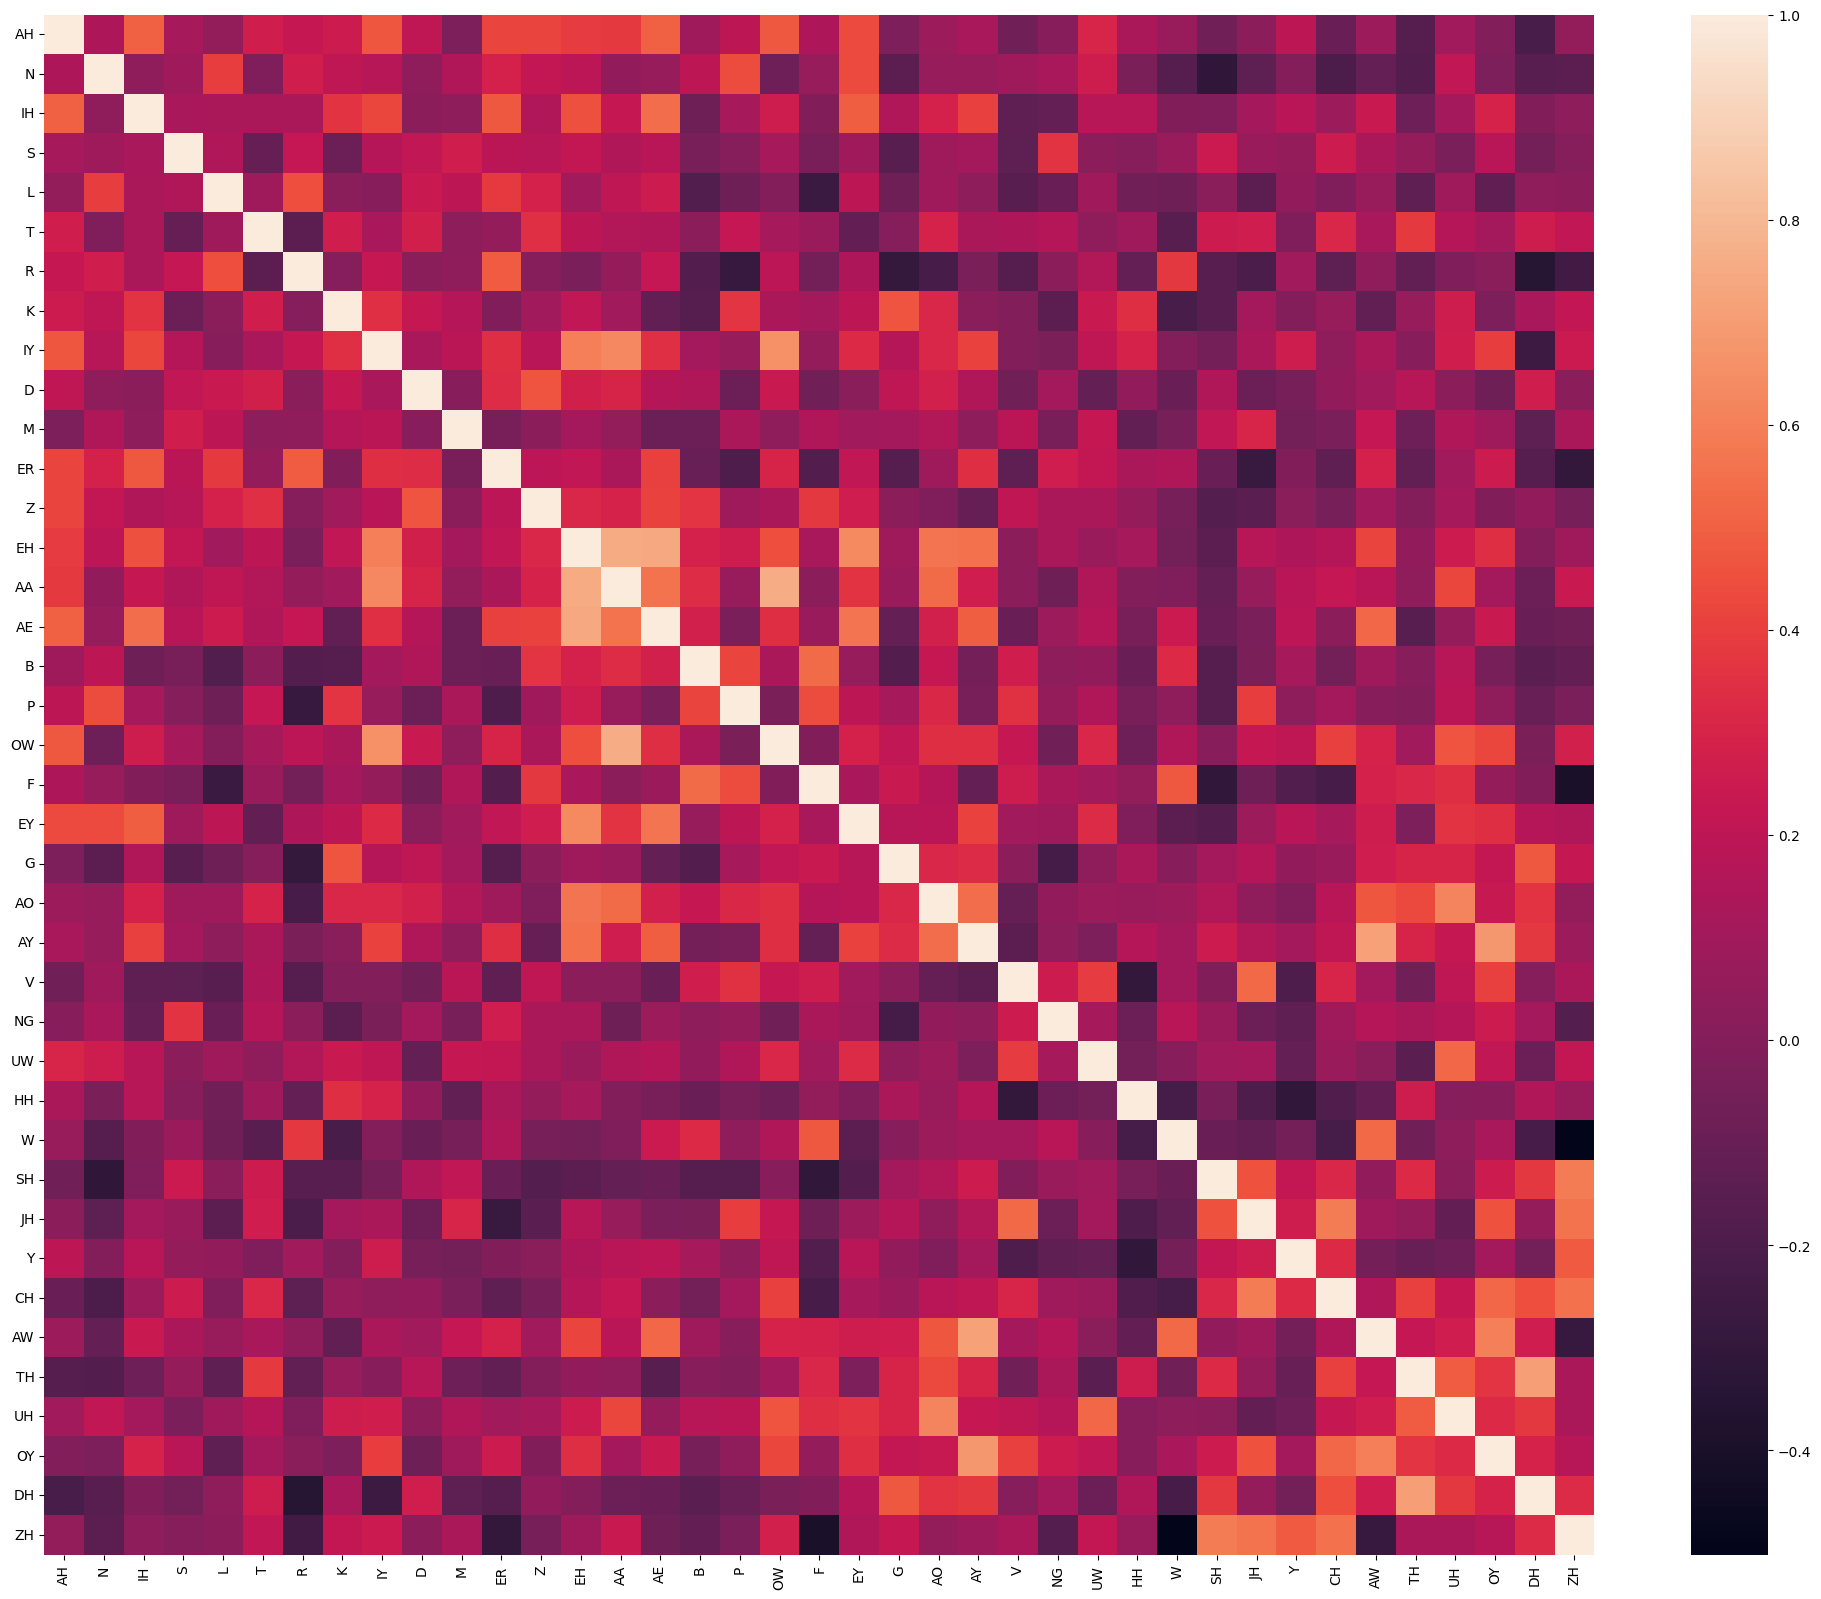

In [10]:
# heat map of similarity between all pairs of words
# create a matrix of zeros
matrix = np.zeros((len(words), len(words)))
# fill the matrix with similarity values
for i in range(len(words)):
    for j in range(0, len(words)):
        matrix[i][j] = model.wv.similarity(words[i], words[j])
# create a heatmap
sns.heatmap(matrix, xticklabels=words, yticklabels=words)
#increase the size of the plot
plt.gcf().set_size_inches(25, 20)
plt.show()